<a href="https://colab.research.google.com/github/Sovanno/NLP/blob/main/LAB1_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Petitions.csv')
df

,id,public_petition_text,reason_category
0,3168490,снег на дороге,Благоустройство
1,3219678,очистить кабельный киоск от рекламы,Благоустройство
2,2963920,"Просим убрать все деревья и кустарники, которы...",Благоустройство
3,3374910,Неудовлетворительное состояние парадной - надп...,Содержание МКД
4,3336285,Граффити,Благоустройство
...,...,...,...
59884,3128111,прошу закрасить граффити,Благоустройство
59885,3276713,Прошу вас отремонтировать пешеходную дорожку,Благоустройство
59886,3274663,Необходимо демонтировать незаконную рекламную ...,Незаконная информационная и (или) рекламная ко...
59887,3359308,Очень гремит на ветру металлическая часть окна...,Кровля


In [ ]:
df_petition = df['public_petition_text']
df_petition

,public_petition_text
0,снег на дороге
1,очистить кабельный киоск от рекламы
2,"Просим убрать все деревья и кустарники, которы..."
3,Неудовлетворительное состояние парадной - надп...
4,Граффити
...,...
59884,прошу закрасить граффити
59885,Прошу вас отремонтировать пешеходную дорожку
59886,Необходимо демонтировать незаконную рекламную ...
59887,Очень гремит на ветру металлическая часть окна...


In [ ]:
df_petition.info()

<class 'pandas.core.series.Series'>
RangeIndex: 59889 entries, 0 to 59888
Series name: public_petition_text
Non-Null Count  Dtype 
--------------  ----- 
59889 non-null  object
dtypes: object(1)
memory usage: 468.0+ KB


In [ ]:
df_petition = df_petition.drop_duplicates()
df_petition.info()

<class 'pandas.core.series.Series'>
Index: 43140 entries, 0 to 59888
Series name: public_petition_text
Non-Null Count  Dtype 
--------------  ----- 
43140 non-null  object
dtypes: object(1)
memory usage: 674.1+ KB


In [ ]:
!pip install num2words

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 4.1 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=c6ae4f9f7dcfbfb4cd2a7289c5ae99d41fc33b6d05f3a43f07c430f97c8f6acf
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [ ]:
import re
from num2words import num2words

In [ ]:
def prep(text):
  http = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
  text = re.sub(http, "", text)
  text = re.sub('\S+@\S+\.\S+', '', text)
  text = re.sub('\+?[1-9][0-9]{10}', '', text)
  text = re.sub(r"\d+", lambda match: " " + num2words(int(match.group(0)), lang="ru") + " ", text)
  text = re.sub(r"\bд\b", "дом", text)
  text = re.sub(r"\bкв\b", "квартира", text)
  text = re.sub(r"\bул\b", "улица", text)
  text = re.sub(r"\bк\b", "квартира", text)
  text = re.sub('[^\s^\w]+', '', text)
  text = re.sub(r"[^а-яА-ЯёЁ\s]", "", text)
  text = re.sub(r"\n", "", text)
  return text

In [ ]:
df_preprocessed = df_petition.apply(prep)
df_preprocessed

,public_petition_text
0,снег на дороге
1,очистить кабельный киоск от рекламы
2,Просим убрать все деревья и кустарники которые...
3,Неудовлетворительное состояние парадной надпи...
4,Граффити
...,...
59881,Надписи рисунки на фасаде
59882,Несогласованная реклама в лифтах порча лифтово...
59885,Прошу вас отремонтировать пешеходную дорожку
59887,Очень гремит на ветру металлическая часть окна...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
def tokenize(text):
  return word_tokenize(text)

In [ ]:
df_tokenized = df_preprocessed.apply(tokenize)
df_tokenized

,public_petition_text
0,"[снег, на, дороге]"
1,"[очистить, кабельный, киоск, от, рекламы]"
2,"[Просим, убрать, все, деревья, и, кустарники, ..."
3,"[Неудовлетворительное, состояние, парадной, на..."
4,[Граффити]
...,...
59881,"[Надписи, рисунки, на, фасаде]"
59882,"[Несогласованная, реклама, в, лифтах, порча, л..."
59885,"[Прошу, вас, отремонтировать, пешеходную, доро..."
59887,"[Очень, гремит, на, ветру, металлическая, част..."


In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 42.2 MB/s eta 0:00:00


In [ ]:
from pymorphy3 import MorphAnalyzer

In [ ]:
morph = MorphAnalyzer()

def lemm(text):
  changed_text = []
  for word in text:
    changed_text.append(morph.normal_forms(word)[0])
  return changed_text

In [ ]:
df_norm = df_tokenized.apply(lemm)
df_norm

,public_petition_text
0,"[снег, на, дорога]"
1,"[очистить, кабельный, киоск, от, реклама]"
2,"[просить, убрать, всё, дерево, и, кустарник, к..."
3,"[неудовлетворительный, состояние, парадный, на..."
4,[граффити]
...,...
59881,"[надпись, рисунок, на, фасад]"
59882,"[несогласованный, реклама, в, лифт, порча, лиф..."
59885,"[просить, вы, отремонтировать, пешеходный, дор..."
59887,"[очень, греметь, на, ветер, металлический, час..."


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def stop_w(text):
  return [w for w in text if w not in stopwords]

In [ ]:
df_stopWords = df_norm.apply(stop_w)
df_stopWords

,public_petition_text
0,"[снег, дорога]"
1,"[очистить, кабельный, киоск, реклама]"
2,"[просить, убрать, всё, дерево, кустарник, кото..."
3,"[неудовлетворительный, состояние, парадный, на..."
4,[граффити]
...,...
59881,"[надпись, рисунок, фасад]"
59882,"[несогласованный, реклама, лифт, порча, лифтов..."
59885,"[просить, отремонтировать, пешеходный, дорожка]"
59887,"[очень, греметь, ветер, металлический, часть, ..."


In [ ]:
df = df_stopWords[df_stopWords.apply(lambda text: len(text) >= 4)]
df

,public_petition_text
1,"[очистить, кабельный, киоск, реклама]"
2,"[просить, убрать, всё, дерево, кустарник, кото..."
3,"[неудовлетворительный, состояние, парадный, на..."
5,"[необходимо, проверить, законность, установка,..."
6,"[уборка, производиться, лестница, очень, грязн..."
...,...
59880,"[самовольный, размещение, блок, кондиционер, с..."
59882,"[несогласованный, реклама, лифт, порча, лифтов..."
59885,"[просить, отремонтировать, пешеходный, дорожка]"
59887,"[очень, греметь, ветер, металлический, часть, ..."


In [ ]:
#df.to_csv("Petitions_redux.csv", index=False)

In [ ]:
from itertools import chain
import random

In [ ]:
docs = df.values.tolist()
print(random.sample(docs, 5))

[['гореть', 'фонарь', 'угол', 'школа'], ['мусор', 'весь', 'внутридомовый', 'территория', 'изз', 'мусорный', 'бак', 'двор'], ['надпись', 'электрический', 'щиток', 'первый', 'этаж', 'первый', 'лестничный', 'площадка', 'единственный', 'подъезд', 'дом', 'пр', 'ветеран', 'сто', 'пятьдесят', 'просить', 'закрасить', 'отмыть'], ['конструкция', 'препятствовать', 'парковка', 'цепь', 'просить', 'удалить', 'обращать', 'внимание', 'прошлый', 'цепь', 'полностью', 'срезанаа', 'просто', 'отодвинуть', 'сторона', 'следующий', 'день', 'сразу', 'вернуться', 'обратно', 'просить', 'полностью', 'срезать', 'цепь', 'х', 'сторона', 'пространство', 'огородить', 'цепь', 'находиться', 'частный', 'собственность', 'являться', 'общий', 'пространство', 'должный', 'иметь', 'доступ', 'всё', 'житель', 'спасибо'], ['больший', 'морской', 'двадцать', 'пять', 'мусор', 'двор']]


In [ ]:
from collections import Counter

In [ ]:
def remove_infrequent_words(documents, min_count):
    all_words = chain(*documents)

    word_counts = Counter(all_words)

    frequent_words = {word for word, count in word_counts.items() if count >= min_count}

    filtered_documents = [[word for word in doc if word in frequent_words] for doc in documents]

    return filtered_documents

In [ ]:
docs = remove_infrequent_words(docs, 5)

In [ ]:
vocabulary = sorted(set(chain(*docs)))
vocabulary

['абп',
 'абрамов',
 'абсолютно',
 'авангардный',
 'аварийка',
 'аварийнодиспетчерский',
 'аварийность',
 'аварийный',
 'авария',
 'август',
 'авиаконструктор',
 'авиатор',
 'авиационный',
 'аврора',
 'авто',
 'автобус',
 'автобусный',
 'автовладелец',
 'автовскай',
 'автолюбитель',
 'автомат',
 'автоматически',
 'автоматический',
 'автомашина',
 'автомобилист',
 'автомобиль',
 'автомобильный',
 'автомойка',
 'автопокрышка',
 'автостоянка',
 'автотранспорт',
 'автотранспортный',
 'автохлам',
 'агенство',
 'агротехнический',
 'адекватный',
 'адм',
 'административный',
 'администратор',
 'администрация',
 'адмирал',
 'адмиралтейский',
 'адр',
 'адрес',
 'адресация',
 'адресный',
 'аж',
 'азс',
 'азу',
 'академик',
 'академический',
 'академия',
 'аккуратно',
 'аккуратный',
 'акт',
 'активно',
 'активный',
 'актуализировать',
 'актуально',
 'актуальный',
 'александр',
 'александровский',
 'алкаш',
 'алкоголь',
 'алкогольный',
 'аллея',
 'алтайский',
 'альпийский',
 'алюминиевый',
 'ама',


In [ ]:
import numpy as np

In [ ]:
print(len(vocabulary))

5947


In [ ]:
voc_len = len(vocabulary)

context_embeddings = pd.DataFrame(
  data=np.zeros((voc_len, voc_len)),
  index=vocabulary,
  columns=vocabulary
)

for doc in docs:
  for i in range(len(doc) - 2):
    main_word = doc[i]
    for word in doc[i + 1 : i + 3]:
        context_embeddings.loc[main_word, word] += 1
        context_embeddings.loc[word, main_word] += 1

context_embeddings

,абп,абрамов,абсолютно,авангардный,аварийка,аварийнодиспетчерский,аварийность,аварийный,авария,август,...,яндекс,яркий,ярко,ярослав,ярославский,ярус,яхтенный,ящик,ёлка,ёмкость
абп,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
абрамов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
абсолютно,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
авангардный,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
аварийка,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ярус,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
яхтенный,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ящик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0
ёлка,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(context_embeddings)

PCA()

In [ ]:
from matplotlib import pyplot as plt

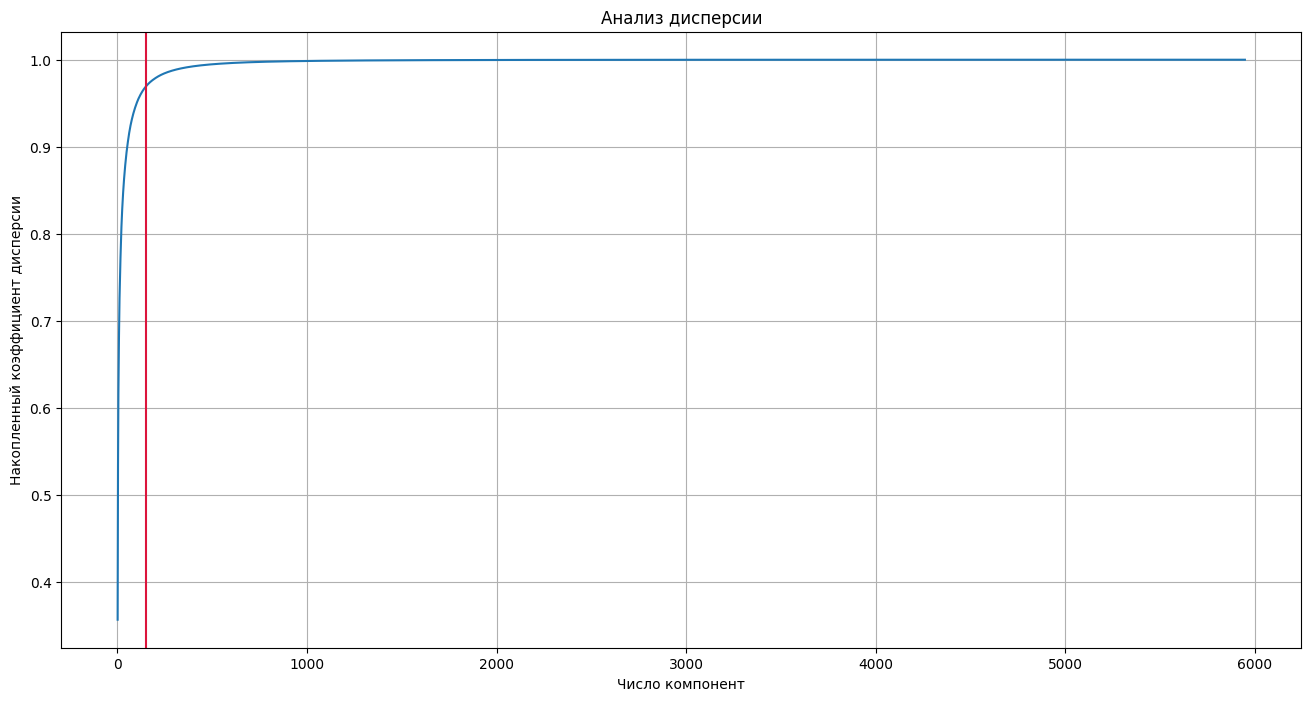

In [ ]:
variance = pca.explained_variance_ratio_
cvariance = variance.cumsum()

plt.figure(figsize=(16, 8))
plt.plot(range(1, len(cvariance) + 1), cvariance)
plt.axvline(x = 150, color='crimson')
plt.xlabel("Число компонент")
plt.ylabel("Накопленный коэффициент дисперсии")
plt.title("Анализ дисперсии")
plt.grid(True)
plt.show()

In [ ]:
pca = PCA(n_components=150)

In [ ]:
embeddings = pca.fit_transform(context_embeddings)
np.savetxt('embeddings.tsv', embeddings, delimiter='\t')

In [ ]:
print(f'Доля дисперсии: {np.sum(pca.explained_variance_ratio_)}')

Доля дисперсии: 0.9692183795001362


In [ ]:
def generate_train_data(docs, std):
    X = []
    y = []
    step = (std - 1) // 2
    for doc in docs:
        for i in range(len(doc)):
            context = doc[max(0, i - step):i] + doc[i + 1: i + step + 1]
            target = doc[i]

            X.append(context)
            y.append(target)

    return X, y

In [ ]:
X, y = generate_train_data(docs, 5)
print(X[0], y[0])

['кабельный', 'киоск'] очистить


In [ ]:
import torch

In [ ]:
def build_vocab(tokenized_texts):
    vocab = set(word for text in tokenized_texts for word in text)
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}
    return word_to_idx, idx_to_word

def convert_to_indices(X, y, word_to_idx):
    X_indices = [[word_to_idx[word] for word in context] for context in X]
    y_indices = [word_to_idx[word] for word in y]
    return X_indices, y_indices

def prepare_tensors(X_indices, y_indices):

    X_filtered = [context for context in X_indices if len(context) == 4]
    y_filtered = [y for context, y in zip(X_indices, y_indices) if len(context) == 4]

    X_tensor = torch.tensor(X_filtered)
    y_tensor = torch.tensor(y_filtered)
    return X_tensor, y_tensor

In [ ]:
word_to_idx, idx_to_word = build_vocab(docs)
X_indices, y_indices = convert_to_indices(X, y, word_to_idx)
X, y = prepare_tensors(X_indices, y_indices)

In [ ]:
import torch.nn as nn

In [ ]:
class Word2VecCBOW(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_dim)
        self.linear = nn.Linear(embed_dim, vocab_size)

    def forward(self, context_idxs):
        embeds = self.embeddings(context_idxs).mean(1)
        out = self.linear(embeds)
        return out

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)

In [ ]:
from torch.optim import Adam

In [ ]:
loss_func = nn.CrossEntropyLoss()
model = Word2VecCBOW(embed_dim=150, vocab_size=5947)
optimizer = Adam(model.parameters(), lr=1e-4)

In [ ]:
epochs = 5
losses = []

for epoch in range(epochs):
    epoch_losses = []
    for xbatch, ybatch in dataloader:
        output = model(xbatch)
        loss_value = loss_func(output, ybatch)

        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()

        epoch_losses.append(loss_value.item())

    avg_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_loss)
    print(f'Epoch: {epoch+1}, Average Loss: {avg_loss}')

Epoch: 1, Average Loss: 6.2727541206044934
Epoch: 2, Average Loss: 6.116818219780446
Epoch: 3, Average Loss: 5.990064037465224
Epoch: 4, Average Loss: 5.88147141676292
Epoch: 5, Average Loss: 5.785580352524149


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def find_most_similar_words(word, word_embeddings, word_to_index, index_to_word, top_n=5):
    target_index = word_to_index[word]
    target_embedding = word_embeddings[target_index]

    similarities = nn.functional.cosine_similarity(word_embeddings, target_embedding, dim=1)
    similar_indices = similarities.argsort(descending=True)[1:top_n+1]

    similar_words = [index_to_word[index.item()] for index in similar_indices]
    return similar_words

word = "машина"
similar_words = find_most_similar_words(word, model.linear.weight.data, word_to_idx, idx_to_word)
print(f"Слова, похожие на '{word}':", similar_words)

Слова, похожие на 'машина': ['автомобиль', 'газон', 'дорога', 'снег', 'тротуар']


In [ ]:
np.savetxt('my_embeddingsW2V.tsv', model.linear.weight.data, delimiter='\t')